In [0]:
# For connection with google drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import tensorflow.python.keras
from tensorflow.python.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Reshape, UpSampling2D, Conv2DTranspose, Input
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras import regularizers
import numpy as np
from matplotlib import pyplot as plt
import glob
np.random.seed(1000)

tensorflow.compat.v1.disable_eager_execution()

In [0]:
# Pretrained model

# model.save('drive/My Drive/novelty_detector.h5')
# model = load_model('drive/My Drive/novelty_detector.h5')

In [0]:
# CNN-AE for novelty detection

keep_prob = 0.8
input_img = Input(shape=(16, 16, 1))

#Layer 1

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(10e-5))(x)
encoded = MaxPooling2D((2, 2))(x)


x = UpSampling2D((2, 2))(encoded)
x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)



In [0]:
# CNN-AE for clustering

keep_prob = 0.8
input_img = Input(shape=(16, 16, 1))

#Layer 1

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(2, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(10e-5))(x)
x = MaxPooling2D((2, 2))(x)
encoded = MaxPooling2D((2, 2))(x)


x = UpSampling2D((2, 2))(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)



In [0]:
model = Model(input_img, decoded)

opt = tensorflow.python.keras.optimizers.Adadelta(lr=0.5, rho=0.95)
model.compile(optimizer=opt, loss='mse')
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 16, 16, 1)]       0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 16, 16, 16)        160       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 16, 16, 16)        2320      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 8, 8, 8)           1160      
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 4, 4, 8)           0   

In [0]:
# Load samples for training 

train_images = []
count = 1
images = glob.glob("drive/My Drive/messages/train/c/*.png", recursive=True)
for i in range(0, len(images)):
    test_image = image.load_img(images[i], target_size = (16, 16), color_mode="grayscale")
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    # test_image = preprocess_input(test_image)
    train_images.append(test_image.astype('float32') / 255)
    # print(count)
    count += 1

In [0]:
# Load samples for validation

val_images = []
count = 1
images = glob.glob("drive/My Drive/messages/val/c/*.png", recursive=True)
for i in range(0, len(images)):
    test_image = image.load_img(images[i], target_size = (16, 16), color_mode="grayscale")
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    # test_image = preprocess_input(test_image)
    val_images.append(test_image.astype('float32') / 255)
    # print(count)
    count += 1
print(len(val_images))

292


In [0]:
x_train = np.vstack(train_images)
print(x_train.shape)

(1365, 16, 16, 1)


In [0]:
x_val = np.vstack(val_images)
print(x_val.shape)

(292, 16, 16, 1)


In [0]:
#Training
model.fit(x_train, x_train,
                epochs=20,
                batch_size=8,
                validation_data=(x_val, x_val))
# result = model.fit(train_it, steps_per_epoch=16, epochs=50, validation_data=val_it, validation_steps=8)

Train on 1365 samples, validate on 292 samples
Epoch 1/20
1365/1365 [==============================] - 2s 1ms/sample - loss: 0.1098 - val_loss: 0.0983
Epoch 2/20
1365/1365 [==============================] - 2s 1ms/sample - loss: 0.0667 - val_loss: 0.0366
Epoch 3/20
1365/1365 [==============================] - 2s 1ms/sample - loss: 0.0229 - val_loss: 0.0142
Epoch 4/20
1365/1365 [==============================] - 2s 1ms/sample - loss: 0.0132 - val_loss: 0.0132
Epoch 5/20
1365/1365 [==============================] - 2s 1ms/sample - loss: 0.0103 - val_loss: 0.0092
Epoch 6/20
1365/1365 [==============================] - 2s 1ms/sample - loss: 0.0093 - val_loss: 0.0085
Epoch 7/20
1365/1365 [==============================] - 2s 1ms/sample - loss: 0.0088 - val_loss: 0.0083
Epoch 8/20
1365/1365 [==============================] - 2s 1ms/sample - loss: 0.0084 - val_loss: 0.0082
Epoch 9/20
1365/1365 [==============================] - 2s 1ms/sample - loss: 0.0081 - val_loss: 0.0076
Epoch 10/20
1365/

In [0]:
# Prediction
predict_images = []

# test_image = image.load_img("drive/My Drive/messages/test/a/901.png", target_size = (16, 16), color_mode="grayscale")
# test_image = image.load_img("drive/My Drive/messages/test/b/1661.png", target_size = (16, 16), color_mode="grayscale")
# test_image = image.load_img("drive/My Drive/messages/test/c/1670.png", target_size = (16, 16), color_mode="grayscale")
# test_image = image.load_img("drive/My Drive/messages/test/d/1668.png", target_size = (16, 16), color_mode="grayscale")
# test_image = image.load_img("drive/My Drive/test_img.png", target_size = (16, 16), color_mode="grayscale")
# test_image = image.load_img("drive/My Drive/iconfinder_Apply_132742.png", target_size = (16, 16), color_mode="grayscale")
# test_image = image.load_img("drive/My Drive/iconfinder_Radiation_132691.png", target_size = (16, 16), color_mode="grayscale")

# test_image = image.load_img("drive/My Drive/labeled/train/normal/1.png", target_size = (16, 16), color_mode="grayscale")
# test_image = image.load_img("drive/My Drive/labeled/train/malicious/1.png", target_size = (16, 16), color_mode="grayscale")

# test_image = image.load_img("drive/My Drive/three_values.png", target_size = (16, 16), color_mode="grayscale")
test_image = image.load_img("drive/My Drive/message_swapped.png", target_size = (16, 16), color_mode="grayscale")

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
normalized = test_image.astype('float32') / 255
predict_images.append(normalized)

test_images = np.vstack(predict_images)

decoded_img = model.predict(test_images)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


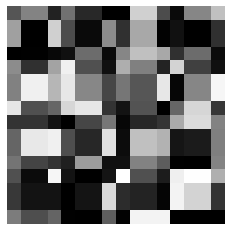

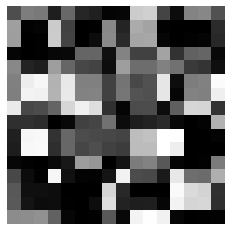

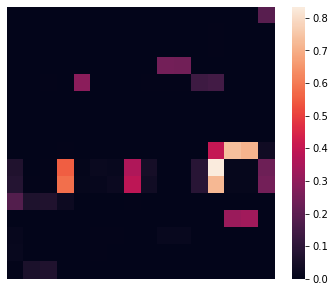

MSE Error: 0.035
Cosine Similarity: 0.072
Structural similarity index: 0.209
Minkowski: 0.913
21.190
2.995
1.783
1.418
1.251
1.159
1.101
1.062
1.035
1.014


In [0]:
import seaborn as sb
from matplotlib.colors import ListedColormap
from scipy.spatial.distance import cdist
from skimage.metrics import structural_similarity as ssim

img1 = normalized.reshape((16,16))
img2 = decoded_img.reshape((16,16))

plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(6,5))
heat_map = sb.heatmap(np.square(img1-img2))
plt.axis('off')
plt.show()

mse = np.square(img1-img2).mean()
print("MSE Error: {0:.3f}".format(mse))

print("Cosine Similarity: {0:.3f}".format(cdist(img1.reshape(1, -1), img2.reshape(1, -1), 'cosine').ravel()[0]))
print("Structural similarity index: {0:.3f}".format(1 - ssim(img1, img2, data_range=img1.max() - img2.min())))
print("Minkowski: {0:.3f}".format(cdist(img1.reshape(1, -1), img2.reshape(1, -1), 'minkowski', p=100).ravel()[0]))

for i in range(10):
  print("{0:.3f}".format(cdist(img1.reshape(1, -1), img2.reshape(1, -1), 'minkowski', p=i+1).ravel()[0]))
  # print("P = {0} : {1:.3f}".format(i+1, cdist(img1.reshape(1, -1), img2.reshape(1, -1), 'minkowski', p=i+1).ravel()[0]))

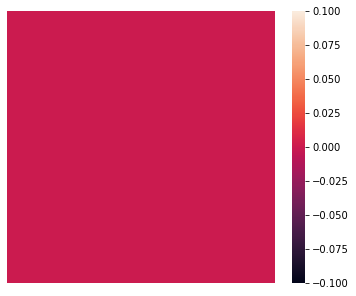

MSE Error: 0.000
Cosine Similarity: 1.000
Structural similarity index: 1.000
P = 1 : 0.000
P = 2 : 0.000
P = 3 : 0.000
P = 4 : 0.000
P = 5 : 0.000
P = 6 : 0.000
P = 7 : 0.000
P = 8 : 0.000
P = 9 : 0.000
P = 10 : 0.000


In [0]:
mal_image = image.load_img("drive/My Drive/labeled/train/normal/1.png", target_size = (16, 16), color_mode="grayscale")
# mal_image = image.load_img("drive/My Drive/labeled/train/malicious/1.png", target_size = (16, 16), color_mode="grayscale")
# mal_image = image.load_img("drive/My Drive/message_swapped.png", target_size = (16, 16), color_mode="grayscale")
# mal_image = image.load_img("drive/My Drive/three_values.png", target_size = (16, 16), color_mode="grayscale")
mal_image = image.img_to_array(mal_image).reshape((16,16))
mal_image = mal_image.astype('float32') / 255

nor_image = image.load_img("drive/My Drive/labeled/train/normal/1.png", target_size = (16, 16), color_mode="grayscale")
nor_image = image.img_to_array(nor_image).reshape((16,16))
nor_image = nor_image.astype('float32') / 255

plt.figure(figsize=(6,5))
heat_map = sb.heatmap(np.square(nor_image-mal_image))
plt.axis('off')
plt.show()

mse = np.square(nor_image-mal_image).mean()
print("MSE Error: {0:.3f}".format(mse))

print("Cosine Similarity: {0:.3f}".format(1 - cdist(nor_image.reshape(1, -1), mal_image.reshape(1, -1), 'cosine').ravel()[0]))
print("Structural similarity index: {0:.3f}".format(ssim(nor_image, mal_image, data_range=nor_image.max() - mal_image.min())))

for i in range(10):
  print("P = {0} : {1:.3f}".format(i+1, cdist(nor_image.reshape(1, -1), mal_image.reshape(1, -1), 'minkowski', p=i+1).ravel()[0]))

In [0]:
import seaborn as sb
from matplotlib.colors import ListedColormap
from scipy.spatial.distance import cdist
from skimage.metrics import structural_similarity as ssim

# test_imgs = glob.glob("drive/My Drive/messages/test/c/*.png", recursive=True)
# test_imgs = glob.glob("drive/My Drive/malicious_data/two_values_swapped/*.png", recursive=True)
# test_imgs = glob.glob("drive/My Drive/malicious_data/three_values_swapped/*.png", recursive=True)
test_imgs = glob.glob("drive/My Drive/malicious_data/message_swapped/*.png", recursive=True)

for i in range(0, len(test_imgs)):
  predict_images = []

  test_image = image.load_img(test_imgs[i], target_size = (16, 16), color_mode="grayscale")
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  normalized = test_image.astype('float32') / 255
  predict_images.append(normalized)

  test_images = np.vstack(predict_images)

  decoded_img = model.predict(test_images)

  img1 = normalized.reshape((16,16))
  img2 = decoded_img.reshape((16,16))

  # print("{0:.3f}".format(1 - ssim(img1, img2, data_range=img1.max() - img2.min())))

  # print("{0:.3f}".format(cdist(img1.reshape(1, -1), img2.reshape(1, -1), 'cosine').ravel()[0]))

  print("{0:.3f}".format(cdist(img1.reshape(1, -1), img2.reshape(1, -1), 'minkowski', p=100).ravel()[0]))

  # mse = np.square(img1-img2).mean()
  # print("{0:.3f}".format(mse))


0.887
0.888
0.887
0.886
0.890
0.889
0.886
0.881
0.880
0.889
0.890
0.878
0.889
0.889
0.889
0.889
0.889
0.888
0.886
0.882
0.887
0.889
0.890
0.886
0.886
0.888
0.888
0.887
0.888
0.886
0.888
0.886
0.888
0.882
0.889
0.882
0.888
0.886
0.886
0.888
0.890
0.884
0.886
0.888
0.886
0.887
0.890
0.887
0.890
0.890
0.883
0.890
0.888
0.890
0.887
0.886
0.889
0.888
0.889
0.882
0.891
0.885
0.887
0.890
0.889
0.887
0.887
0.888
0.889
0.887
0.890
0.887
0.879
0.888
0.882
0.889
0.885
0.887
0.882
0.886
0.883
0.885
0.890
0.887
0.885
0.889
0.886
0.889
0.889
0.887
0.889
0.887
0.886
0.888
0.888
0.887
0.890
0.889
0.888
0.887
0.886
0.888
0.880
0.879
0.890
0.883
0.889
0.887
0.888
0.887
0.889
0.889
0.886
0.887
0.889
0.885
0.886
0.890
0.889
0.886
0.889
0.889
0.888
0.888
0.887
0.884
0.888
0.888
0.885
0.889
0.888
0.887
0.887
0.886
0.889
0.889
0.890
0.888
0.886
0.886
0.887
0.889
0.888
0.889
0.886
0.882
0.890
0.886
0.885
0.887
0.889
0.885
0.890
0.887
0.887
0.890
0.887
0.888
0.885
0.890
0.889
0.885
0.889
0.888
0.887
0.886
0.88